In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization
from sklearn.model_selection import train_test_split, GridSearchCV # data splitting
from sklearn.preprocessing import StandardScaler # data preprocessing
from sklearn.feature_selection import SelectKBest, f_classif # feature selection
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # model evaluation
import xgboost as xgb # model building
from sklearn.svm import SVC #model building
import lightgbm as lgb # model building
import pickle # model saving
from scipy import stats
from sklearn.ensemble import  RandomForestClassifier



# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/System-Threat-Forecaster/sample_submission.csv
/kaggle/input/System-Threat-Forecaster/train.csv
/kaggle/input/System-Threat-Forecaster/test.csv


# Here we loaded the training and test datasets.
**We checked their shapes, displayed the first few rows, and obtained information about the data types and non-null counts. This initial exploration will help us in the subsequent steps of data analysis and preprocessing.**

In [2]:

df =pd.read_csv('/kaggle/input/System-Threat-Forecaster/train.csv')
X_test =pd.read_csv('/kaggle/input/System-Threat-Forecaster/test.csv')

In [3]:
# Check the shape of the training data
#df.shape

In [4]:
# Check the shape of the test data
#X_test.shape

In [5]:
# Display the first few rows of the training data
#df.head()

In [6]:
# Display the first few rows of the test data
#X_test.head()

In [7]:
# Get information about the training data
#df.info()

In [8]:
# Get information about the test data
#X_test.info()

# Exploratory Data Analysis
**we will perform exploratory data analysis (EDA) on the training dataset. EDA helps us understand the data better, identify patterns, and uncover insights that can inform our modeling decisions.**

In [9]:
# Summary statistics
#df.describe(include='all')

### Check for Missing Values
**We will check for missing values in the dataset to understand the extent of data cleaning required.**

In [10]:
# Check for missing values
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values[missing_values > 0]

SMode                                 981
CityID                                623
RegionIdentifier                      559
IsGamer                               559
InternalBatteryNumberOfCharges        515
FirmwareManufacturerID                376
FirmwareVersionID                     334
IsFlightsDisabled                     326
OEMModelID                            228
OEMNameID                             212
FirewallEnabled                       166
TotalPhysicalRAMMB                    151
IsAlwaysOnAlwaysConnectedCapable      134
OSInstallLanguageID                   113
PrimaryDiskCapacityMB                 110
SystemVolumeCapacityMB                110
IEVersionID                           107
ProcessorManufacturerID                85
ProcessorModelID                       85
ProcessorCoreCount                     85
IsSystemProtected                      76
NumAntivirusProductsEnabled            76
NumAntivirusProductsInstalled          76
AntivirusConfigID                 

### Visualize Missing Values
**We will visualize the missing values to get a better understanding of their distribution across the dataset.**

In [ ]:
# Plot missing values
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values[missing_values > 0].index, y=missing_values[missing_values > 0])
plt.title('Missing Values in Training Data')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()

### Data Distribution
**Next, we will analyze the distribution of the target variable and other features to understand their characteristics.**

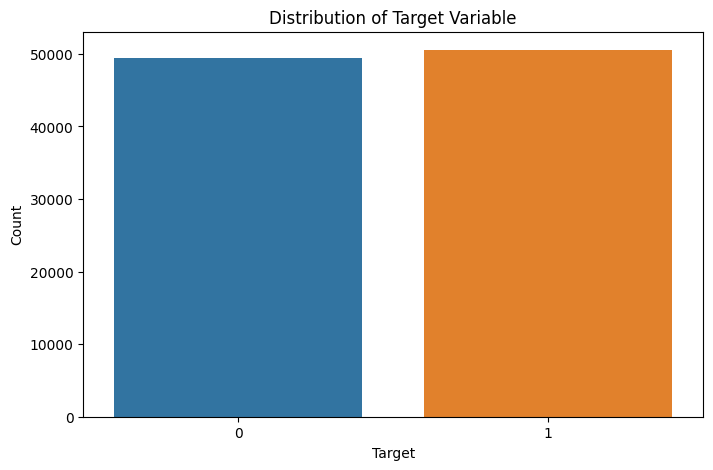

In [12]:
# Distribution of the target variable
plt.figure(figsize=(8, 5))
sns.countplot(x='target', data=df)
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

### Correlation Analysis
**We will compute the correlation matrix to identify relationships between features and the target variable.**

In [ ]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Correlation matrix
correlation_matrix = numeric_df.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


### Conclusion
Here we performed exploratory data analysis on the training dataset. We checked for missing values, visualized the distribution of the target variable, and analyzed the correlation between features. These insights will guide our data cleaning and preprocessing steps.

# Data Visualization

Here we will visualize the data using various plots and charts. Each visualization will be explained to provide insights into the dataset.

In [ ]:
# Display the first few rows of the dataset
#df.head()

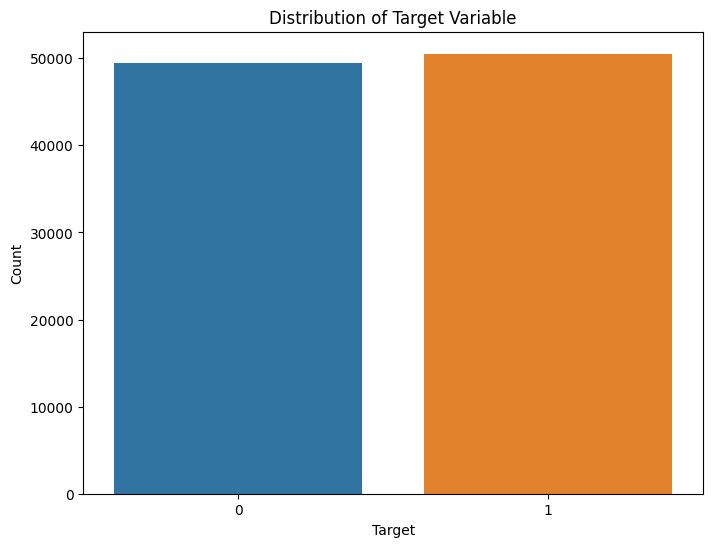

In [ ]:
# Visualize the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=df)
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

**The above chart shows the distribution of the target variable. It helps us understand the balance between different classes in the dataset.**

In [ ]:
# Visualize the correlation matrix
plt.figure(figsize=(12, 10))
numeric_train_data = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_train_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


**The correlation matrix visualizes the relationships between different features in the dataset. High correlation values (close to 1 or -1) indicate a strong relationship between features.**

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


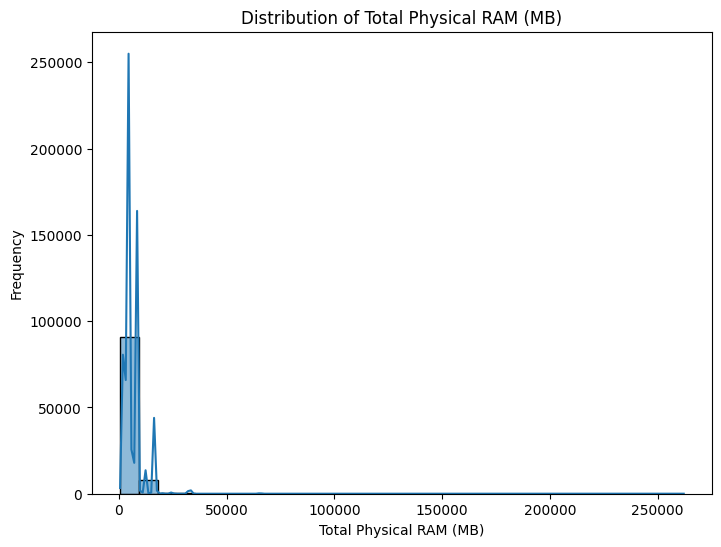

In [17]:
# Visualize the distribution of a specific feature
plt.figure(figsize=(8, 6))
sns.histplot(df['TotalPhysicalRAMMB'], bins=30, kde=True)
plt.title('Distribution of Total Physical RAM (MB)')
plt.xlabel('Total Physical RAM (MB)')
plt.ylabel('Frequency')
plt.show()

**This histogram shows the distribution of a specific feature in the dataset. The kernel density estimate (KDE) line provides a smooth approximation of the distribution.**

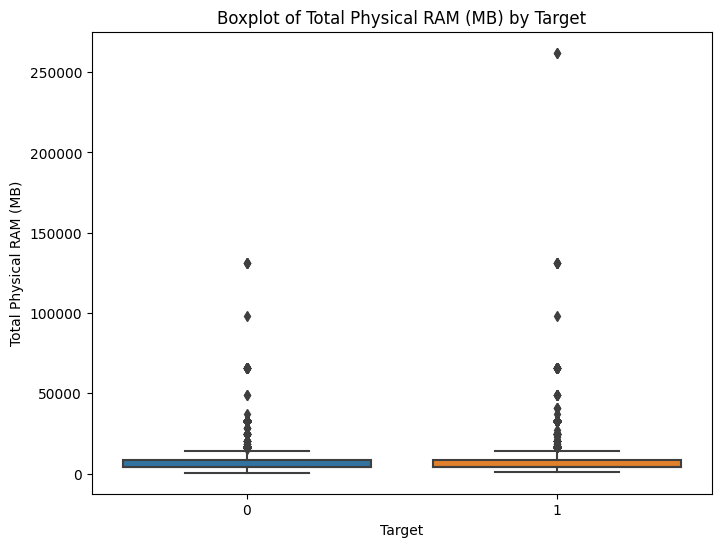

In [18]:
# Visualize relationships between features and the target variable
plt.figure(figsize=(8, 6))
sns.boxplot(x='target', y='TotalPhysicalRAMMB', data=df)
plt.title('Boxplot of Total Physical RAM (MB) by Target')
plt.xlabel('Target')
plt.ylabel('Total Physical RAM (MB)')
plt.show()

**The boxplot above illustrates the distribution of a feature across different classes of the target variable. It helps identify potential outliers and the central tendency of the feature for each class.**

# Statistical Analysis

**Here, we will perform statistical analysis on the dataset. This includes hypothesis testing and correlation analysis to understand the relationships between features and the target variable.**

## Descriptive Statistics

**Let's start by looking at the descriptive statistics of the dataset to understand the distribution of the features.**

In [19]:
#df.describe()

## Correlation Analysis

**Next, we will analyze the correlation between features and the target variable using a heatmap.**

In [ ]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_cols.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


## Hypothesis Testing

**We will perform a t-test to check if there is a significant difference between the means of two groups in the target variable.**


In [ ]:
# Perform t-test
group1 = df[df['target'] == 0]['ProcessorCoreCount']
group2 = df[df['target'] == 1]['ProcessorCoreCount']
t_stat, p_value = stats.ttest_ind(group1, group2)
t_stat, p_value

The t-statistic and p-value will help us determine if the difference between the two groups is statistically significant.

In [ ]:
# Conclusion based on p-value
alpha = 0.05
if p_value < alpha:
    conclusion = 'Reject the null hypothesis: significant difference exists.'
else:
    conclusion = 'Fail to reject the null hypothesis: no significant difference exists.'
conclusion

## Summary

Here, we performed statistical analysis on the dataset, including descriptive statistics, correlation analysis, and hypothesis testing. These analyses provide insights into the relationships between features and the target variable, which can inform further modeling steps.


# Train-Validation Split

Here, we will split the processed training dataset into training and validation sets. This is an essential step in machine learning to evaluate the model's performance on unseen data.

## Splitting the Data

We will split the dataset into features (X) and target variable (y), and then perform a train-validation split.
# Handling Missing  values
Fill numeric missing values with median and categorical with mode 

In [23]:
for col in df.columns:
    if col == 'target':
        df.loc[:, col] = df[col].fillna(df[col].median())
        continue
    if df[col].dtype in ['float64', 'int64']:
        df.loc[:, col] = df[col].fillna(df[col].median())
        X_test.loc[:, col] = X_test[col].fillna(df[col].median())
    else:
        df.loc[:, col] = df[col].fillna(df[col].mode()[0])
        X_test.loc[:, col] = X_test[col].fillna(df[col].mode()[0])

# Encode Categorical Features
df_encoded = pd.get_dummies(df, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

# Align train and test datasets to ensure they have the same feature set
df_encoded, X_test_encoded = df_encoded.align(X_test_encoded, join='inner', axis=1)

# Feature Selection
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
selector = SelectKBest(score_func=f_classif, k=40)
X_selected = selector.fit_transform(df_encoded.drop(columns=['target'], errors='ignore'), df['target'])
X_test_selected = selector.transform(X_test_encoded)

# Standardize Numeric Features
scaler = StandardScaler()
X_selected = scaler.fit_transform(X_selected)
X_test_selected = scaler.transform(X_test_selected)

# Extract Target Variable and Features
y = df['target']

# Train-Validation Split
X_train, X_val, y_train, y_val = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)
# Display the shapes of the training and validation sets
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)



/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 0 14 37] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


(80000, 40) (20000, 40) (80000,) (20000,)


## Summary

We have successfully split the processed training dataset into training and validation sets. The training set will be used to train the models, while the validation set will be used to evaluate their performance.

# BUILDING MODEL And HyperParameter Tuning

In [24]:
# from sklearn.dummy import DummyClassifier
# model =DummyClassifier().fit(x,y)
# y_pred =model.predict(X_test)

[LightGBM] [Info] Number of positive: 40420, number of negative: 39580
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015181 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 539
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505250 -> initscore=0.021001
[LightGBM] [Info] Start training from score 0.021001
Validation Accuracy: 0.62

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.55      0.59      9895
           1       0.61      0.69      0.65     10105

    accuracy                           0.62     20000
   macro avg       0.62      0.62      0.62     20000
weighted avg       0.62      0.62      0.62     20000



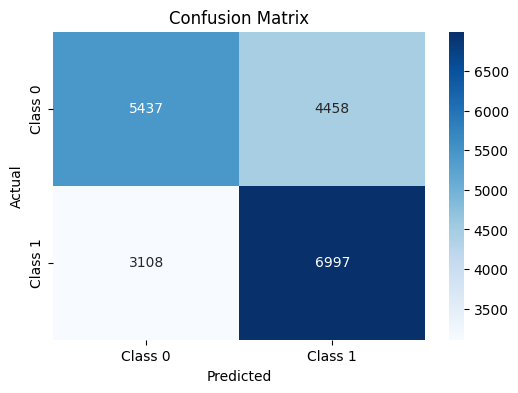

Fitting 3 folds for each of 81 candidates, totalling 243 fits
[LightGBM] [Info] Number of positive: 40420, number of negative: 39580
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012758 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 539
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505250 -> initscore=0.021001
[LightGBM] [Info] Start training from score 0.021001
Best Validation Accuracy: 0.62

Best Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.55      0.59      9895
           1       0.61      0.69      0.65     10105

    accuracy                           0.62     20000
   macro avg       0.62      0.62      0.62     20000
weighted avg       0.62      0.62      0.62     200

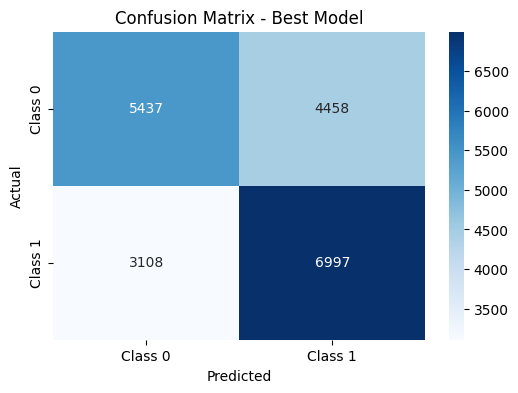

In [25]:
# Build and Train LightGBM Model
model = lgb.LGBMClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate the Model
y_val_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_val, y_val_pred))

# Confusion Matrix
cm = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Hyperparameter Tuning
param_grid = {
    'num_leaves': [31, 50, 100],
    'max_depth': [-1, 10, 20],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best Model
best_model = grid_search.best_estimator_

# Evaluate the Best Model
y_val_pred_best = best_model.predict(X_val)
best_accuracy = accuracy_score(y_val, y_val_pred_best)
print(f"Best Validation Accuracy: {best_accuracy:.2f}")
print("\nBest Classification Report:")
print(classification_report(y_val, y_val_pred_best))

# Confusion Matrix for Best Model
cm_best = confusion_matrix(y_val, y_val_pred_best)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title("Confusion Matrix - Best Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Make Predictions on Test Data
y_pred = best_model.predict(X_test_selected)

In [26]:
# # Build and Train XGBoost Model
# model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
# model.fit(X_train, y_train)

# # Evaluate the Model
# y_val_pred = model.predict(X_val)
# accuracy = accuracy_score(y_val, y_val_pred)
# print(f"Validation Accuracy: {accuracy:.2f}")
# print("\nClassification Report:")
# print(classification_report(y_val, y_val_pred))

# # Confusion Matrix
# cm = confusion_matrix(y_val, y_val_pred)
# plt.figure(figsize=(6, 4))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
# plt.title("Confusion Matrix")
# plt.xlabel("Predicted")
# plt.ylabel("Actual")
# plt.show()

# # Hyperparameter Tuning
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [3, 5, 7, 9],
#     'learning_rate': [0.01, 0.05, 0.1, 0.2],
#     'subsample': [0.6, 0.8, 0.9, 1.0],
#     'colsample_bytree': [0.6, 0.8, 0.9, 1.0]
# }

# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')
# grid_search.fit(X_train, y_train)

# # Best Model
# best_model = grid_search.best_estimator_

# # Evaluate the Best Model
# y_val_pred_best = best_model.predict(X_val)
# best_accuracy = accuracy_score(y_val, y_val_pred_best)
# print(f"Best Validation Accuracy: {best_accuracy:.2f}")
# print("\nBest Classification Report:")
# print(classification_report(y_val, y_val_pred_best))

# # Confusion Matrix for Best Model
# cm_best = confusion_matrix(y_val, y_val_pred_best)
# plt.figure(figsize=(6, 4))
# sns.heatmap(cm_best, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
# plt.title("Confusion Matrix - Best Model")
# plt.xlabel("Predicted")
# plt.ylabel("Actual")
# plt.show()
# # Make Predictions on Test Data
# y_pred = best_model.predict(X_test_selected)

In [27]:
# # Build and Train SVC Model
# model = SVC(random_state=42, probability=True)
# model.fit(X_train, y_train)

# # Evaluate the Model
# y_val_pred = model.predict(X_val)
# accuracy = accuracy_score(y_val, y_val_pred)
# print(f"Validation Accuracy: {accuracy:.2f}")
# print("\nClassification Report:")
# print(classification_report(y_val, y_val_pred))

# # Confusion Matrix
# cm = confusion_matrix(y_val, y_val_pred)
# plt.figure(figsize=(6, 4))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
# plt.title("Confusion Matrix")
# plt.xlabel("Predicted")
# plt.ylabel("Actual")
# plt.show()

# # Hyperparameter Tuning
# param_grid = {
#     'C': [0.1, 1, 10],
#     'kernel': ['linear', 'rbf', 'poly'],
#     'gamma': ['scale', 'auto']
# }

# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')
# grid_search.fit(X_train, y_train)

# # Best Model
# best_model = grid_search.best_estimator_

# # Evaluate the Best Model
# y_val_pred_best = best_model.predict(X_val)
# best_accuracy = accuracy_score(y_val, y_val_pred_best)
# print(f"Best Validation Accuracy: {best_accuracy:.2f}")
# print("\nBest Classification Report:")
# print(classification_report(y_val, y_val_pred_best))

# # Confusion Matrix for Best Model
# cm_best = confusion_matrix(y_val, y_val_pred_best)
# plt.figure(figsize=(6, 4))
# sns.heatmap(cm_best, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
# plt.title("Confusion Matrix - Best Model")
# plt.xlabel("Predicted")
# plt.ylabel("Actual")
# plt.show()

# # Make Predictions on Test Data
# y_pred = best_model.predict(X_test_selected)


In [28]:
# # Build and Train Random Forest Model
# model = RandomForestClassifier(random_state=42)
# model.fit(X_train, y_train)

# # Evaluate the Model
# y_val_pred = model.predict(X_val)
# accuracy = accuracy_score(y_val, y_val_pred)
# print(f"Validation Accuracy: {accuracy:.2f}")
# print("\nClassification Report:")
# print(classification_report(y_val, y_val_pred))

# # Confusion Matrix
# cm = confusion_matrix(y_val, y_val_pred)
# plt.figure(figsize=(6, 4))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
# plt.title("Confusion Matrix")
# plt.xlabel("Predicted")
# plt.ylabel("Actual")
# plt.show()

# # Hyperparameter Tuning
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'bootstrap': [True, False]
# }

# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')
# grid_search.fit(X_train, y_train)

# # Best Model
# best_model = grid_search.best_estimator_

# # Evaluate the Best Model
# y_val_pred_best = best_model.predict(X_val)
# best_accuracy = accuracy_score(y_val, y_val_pred_best)
# print(f"Best Validation Accuracy: {best_accuracy:.2f}")
# print("\nBest Classification Report:")
# print(classification_report(y_val, y_val_pred_best))

# # Confusion Matrix for Best Model
# cm_best = confusion_matrix(y_val, y_val_pred_best)
# plt.figure(figsize=(6, 4))
# sns.heatmap(cm_best, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
# plt.title("Confusion Matrix - Best Model")
# plt.xlabel("Predicted")
# plt.ylabel("Actual")
# plt.show()

# # Make Predictions on Test Data
# y_pred = best_model.predict(X_test_selected)


# Create Submission File

In [29]:
submission =pd.DataFrame({"id":range(0,X_test.shape[0]),
                            "target":y_pred})
submission.to_csv('submission.csv',index =False) 